<a href="https://colab.research.google.com/github/jtoyhh/Stock_Price_Prediction/blob/main/Algo_Trading_Strategy_Averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses the three moving average crossover strategy to determine when to buy and sell stock

In [ ]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data


In [ ]:
#Store the data into a variable
df = pd.read_csv('./data/TSLA.csv')

#Set the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-18,2019-11-18,70.584000,70.629997,69.220001,69.998001,69.998001,22002000
2019-11-19,2019-11-19,70.349998,71.998001,69.559998,71.903999,71.903999,38624000
2019-11-20,2019-11-20,72.000000,72.239998,69.914001,70.444000,70.444000,33625500
2019-11-21,2019-11-21,70.902000,72.167999,70.800003,70.966003,70.966003,30550000
2019-11-22,2019-11-22,68.031998,68.199997,66.000000,66.608002,66.608002,84353000
...,...,...,...,...,...,...,...
2020-06-03,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
2020-06-04,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
2020-06-05,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
2020-06-08,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500


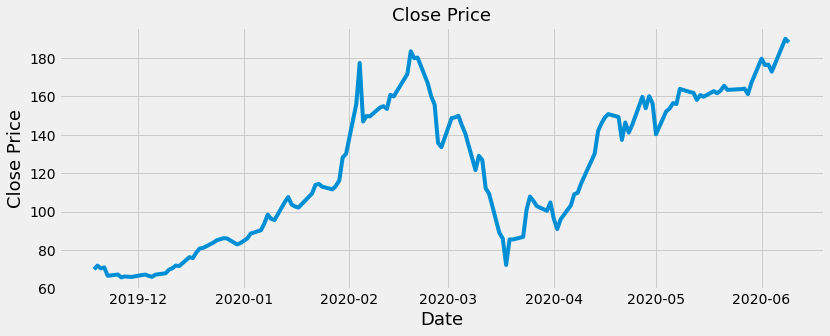

In [ ]:
#Visually show the close price
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price',fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.show()

In [ ]:
#Calculate the three moving averages
#Calculate the short/ fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust = False).mean()
#Calculate the Middle/Medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust= False).mean()
#Calculate the long/slow exponential moving average
LongEMA = df.Close.ewm(span=63, adjust = False).mean()

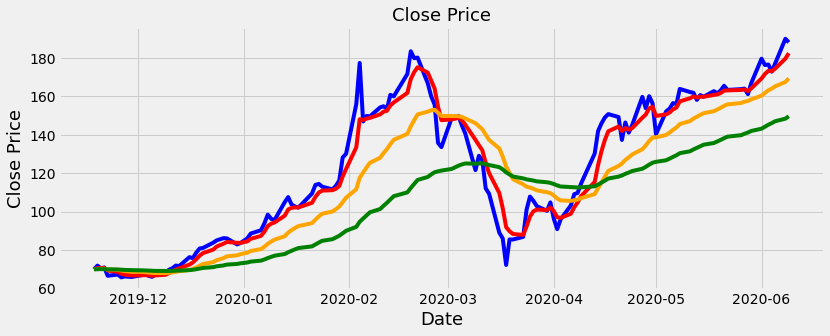

In [ ]:
#Visualize the closing price and the exponential moving averages
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price',fontsize = 18)
plt.plot(df['Close'], label= 'Close Price', color = 'blue')
plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red')
plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange')
plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'green')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.show()

In [ ]:
# Add the exponential moving averages to the dataset
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA

In [ ]:
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2019-11-18,2019-11-18,70.584000,70.629997,69.220001,69.998001,69.998001,22002000,69.998001,69.998001,69.998001
2019-11-19,2019-11-19,70.349998,71.998001,69.559998,71.903999,71.903999,38624000,70.633334,70.171274,70.057563
2019-11-20,2019-11-20,72.000000,72.239998,69.914001,70.444000,70.444000,33625500,70.570222,70.196067,70.069640
2019-11-21,2019-11-21,70.902000,72.167999,70.800003,70.966003,70.966003,30550000,70.702149,70.266061,70.097651
2019-11-22,2019-11-22,68.031998,68.199997,66.000000,66.608002,66.608002,84353000,69.337434,69.933510,69.988599
...,...,...,...,...,...,...,...,...,...,...
2020-06-03,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500,173.301140,163.168326,145.231363
2020-06-04,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500,173.159429,164.050842,146.095258
2020-06-05,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500,174.483621,165.240039,147.065156
2020-06-08,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500,179.650412,167.489489,148.406370


In [ ]:
#Create the function to buy and sell the stock
def buy_sell_function(data):

    buy_list = []
    sell_list = []
    flag_long = False
    flag_short = False

    for i in range(0, len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True
        elif flag_short == True and data['Short'][i] >data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)

    return (buy_list, sell_list)


In [ ]:
#Add the buy and sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

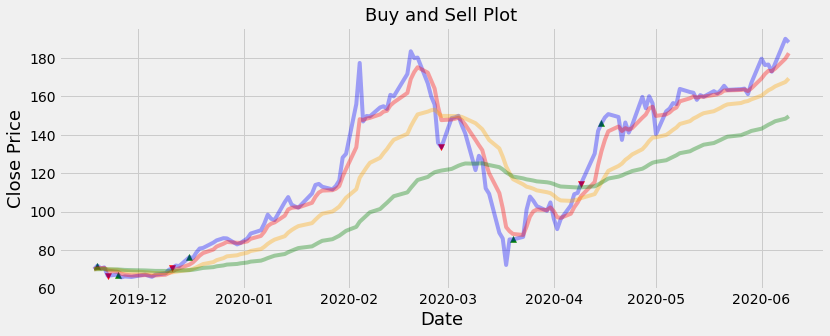

In [ ]:
#Visually shwo the stock buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.title('Buy and Sell Plot',fontsize = 18)
plt.plot(df['Close'], label= 'Close Price', color = 'blue', alpha = 0.35)
plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red', alpha = 0.35)
plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange', alpha = 0.35)
plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'green', alpha = 0.35)
plt.scatter(df.index, df['Buy'], color = 'green', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color = 'red', marker='v', alpha=1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.show()